## Assignment 1 – Predict Sales for Retail Stores

**Agenda**

  - Join these datasets using Store column
  - Fill missing values using appropriate techniques
  - Extract new columns from date column and ignore the Data column
  - Ignore the customer column for this analysis, since we might not know the customer count for future dates. Hence this      column should not be an input to the model
  - Convert non-numerical columns to numerical columns using appropriate methods
  - Split data in to training (80%) and testing (20%) (use random_state=1)
  - Standardize all input columns using StandardScaler function in sklearn
  - Using statsmodels package, identify if the coefficients of the input variables is significant or not. Make sure that you re-build the model until only significant columns are present in the model
  - Using relevant influencing columns, build a linear regression model
  - Report RMSE, R square value
  - Plot the coefficients of the input variables using the bar chart

  
 
### Problem Statement : Predict sales value for multiple stores

### Dataset :

 - Dataset: store_sales zip file: sales.csv and store.csv

 - Dataset Description:

 - sales.csv: For multiple stores, we have daily sales values for multiple years.

 - store.csv: Each row provides metadata about a particular store
 

<a href="https://intune.timestsw.com/lms/pluginfile.php/1916/mod_assign/introattachment/0/store_sales_dataset.zip?forcedownload=1">Download Dataset</a>

In [5]:
# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
# load and preview the Store dataset
store = pd.read_csv('C:/Users/ejhajee/Downloads/store.csv')
store.head()
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [7]:
print(store.isna().sum())

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


In [8]:
# load and preview the Sales dataset
sales = pd.read_csv('C:/Users/ejhajee/Downloads/sales.csv')
sales.head()
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [9]:
print(sales.isna().sum())

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64


In [10]:
# Figure out the shape of data and missing dataset
print('Sales data size:', sales.shape)
sales.info()
# As per the result below no missing values found

Sales data size: (1017209, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


## Data Dictionary

### Sales
 - Variables - 9
 - Observations - 1017209
 
## Integer Variables:
 - Store
 - DayOfWeek
 - Sales
 - Customers
 - Promo
 - SchoolHoliday
 
## Categorical Variables:
 - Date
 - StateHoliday
 
 ## NA Values
 - None
 
 ### Store
 - Variables - 10
 - Observations - 1115
 
## Integer Variables:
 - Store
 - CompetitionDistance
 - CompetitionOpenSinceMonth
 - CompetitionOpenSinceYear
 - Promo2
 - Promo2SinceWeek
 - Promo2SinceYear
 
## Categorical Variables:
 - StoreType
 - Assortment
 - PromoInterval
 
 ## NA Values
 - CompetitionDistance          3
 - CompetitionOpenSinceMonth    354
 - CompetitionOpenSinceYear     354
 - Promo2SinceWeek              544
 - Promo2SinceYear              544
 - PromoInterval                544

In [11]:
#1. Join these Sales & Store datasets using Store column
store_sales =pd.merge(sales, store, on="Store")

In [12]:
# 4. Ignore the customer column for this analysis, since we might not know the customer count for future dates. 
# Hence this column should not be an input to the model
store_sales.drop('Customers', axis=1, inplace=True)

In [13]:
# 2. Fill missing values using appropriate techniques
# Fill the NULL values with mean(), mode() and max() values for numerical columns and with No Event for categorical Columns
store_sales['CompetitionDistance'].fillna(value=store_sales['CompetitionDistance'].mean(), inplace=True)
store_sales['CompetitionOpenSinceMonth'].fillna(value=store_sales['CompetitionOpenSinceMonth'].mode()[0], inplace=True)
store_sales['CompetitionOpenSinceYear'].fillna(value=store_sales['CompetitionOpenSinceYear'].max(), inplace=True)
store_sales['Promo2'].fillna(value=0, inplace=True)
store_sales['CompetitionOpenSinceYear'].fillna(value=store_sales['CompetitionOpenSinceYear'].max(), inplace=True)
store_sales['Promo2SinceWeek'].fillna(value=store_sales['Promo2SinceWeek'].mode()[0], inplace=True)
store_sales['Promo2SinceYear'].fillna(value=store_sales['Promo2SinceYear'].max(), inplace=True)
store_sales['PromoInterval'].fillna(value='No Event', inplace=True)
#store_sales.info()

In [14]:
# Shape and info for merged data
print("Shape Of Merged Data:", store_sales.shape)
print("Info of Merged Data:", store_sales.info())

Shape Of Merged Data: (1017209, 17)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 17 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Open                       1017209 non-null  int64  
 5   Promo                      1017209 non-null  int64  
 6   StateHoliday               1017209 non-null  object 
 7   SchoolHoliday              1017209 non-null  int64  
 8   StoreType                  1017209 non-null  object 
 9   Assortment                 1017209 non-null  object 
 10  CompetitionDistance        1017209 non-null  float64
 11  CompetitionOpenSinceMonth  1017209 non-null  float64
 12  CompetitionOpenSinceYear   1017209

In [15]:
# Observe the values for merged data
store_sales.head()

,Store,DayOfWeek,Date,Sales,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,1,1,0,1,c,a,1270.0,9.0,2008.0,0,14.0,2015.0,No Event
1,1,4,2015-07-30,5020,1,1,0,1,c,a,1270.0,9.0,2008.0,0,14.0,2015.0,No Event
2,1,3,2015-07-29,4782,1,1,0,1,c,a,1270.0,9.0,2008.0,0,14.0,2015.0,No Event
3,1,2,2015-07-28,5011,1,1,0,1,c,a,1270.0,9.0,2008.0,0,14.0,2015.0,No Event
4,1,1,2015-07-27,6102,1,1,0,1,c,a,1270.0,9.0,2008.0,0,14.0,2015.0,No Event


In [16]:
# Add Date field for predictions
store_sales['Date']= pd.to_datetime(store_sales['Date'])

In [17]:
# 3. Extract new columns Year. Moth and Day from date column and ignore the Date column
store_sales['Year']=store_sales['Date'].dt.year
store_sales['Month']=store_sales['Date'].dt.month
store_sales['Day']=store_sales['Date'].dt.day

In [18]:
# After extracting the new date columns, ignoring the Date column
store_sales.drop("Date", axis=1, inplace=True)

In [19]:
store_sales.head()

,Store,DayOfWeek,Sales,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,5263,1,1,0,1,c,a,1270.0,9.0,2008.0,0,14.0,2015.0,No Event,2015,7,31
1,1,4,5020,1,1,0,1,c,a,1270.0,9.0,2008.0,0,14.0,2015.0,No Event,2015,7,30
2,1,3,4782,1,1,0,1,c,a,1270.0,9.0,2008.0,0,14.0,2015.0,No Event,2015,7,29
3,1,2,5011,1,1,0,1,c,a,1270.0,9.0,2008.0,0,14.0,2015.0,No Event,2015,7,28
4,1,1,6102,1,1,0,1,c,a,1270.0,9.0,2008.0,0,14.0,2015.0,No Event,2015,7,27


### Explore the data

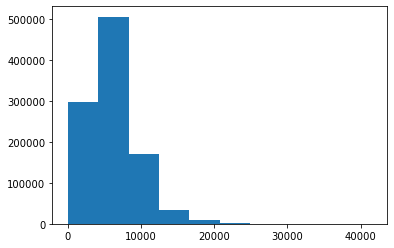

In [20]:
# Distribution of Sales
plt.hist(store_sales['Sales'])
plt.show()

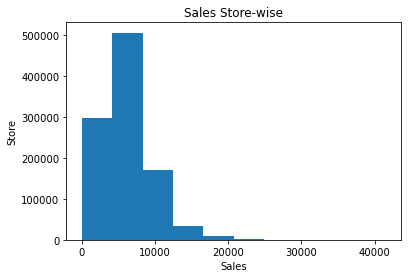

In [21]:
 #distribution of sales
plt.hist(store_sales['Sales'])
plt.xlabel('Sales')
plt.ylabel('Store')
plt.title('Sales Store-wise')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021892587D30>,
      dtype=object)

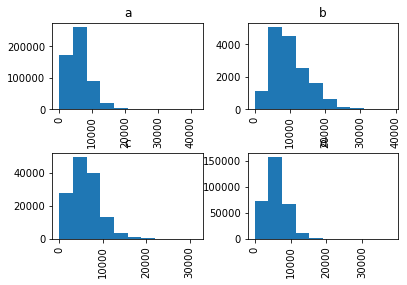

In [22]:
 #distribution of sales
store_sales.Sales.hist(by=store_sales.StoreType)

In [23]:
#Identifying Independent X and dependent Y variables
y_cols = "Sales"
X_cols=list(store_sales.columns)
# Removing the target column from Independent Variables
X_cols.remove('Sales')
# Displaying the Independent and Dependent variables
print("Independent Columns:", X_cols)
print("Dependent Columns:", y_cols)

Independent Columns: ['Store', 'DayOfWeek', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day']
Dependent Columns: Sales


In [24]:
# Convert non-numerical columns to numerical columns using appropriate methods
# Use one hot encoding to encode char dataset into numeric
X_encoded_data = pd.get_dummies(store_sales[X_cols], drop_first=True)

In [25]:
# Making a copy of encoded X and Y columns
X= X_encoded_data.copy()
Y=store_sales["Sales"].copy()

In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 26 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   Store                           1017209 non-null  int64  
 1   DayOfWeek                       1017209 non-null  int64  
 2   Open                            1017209 non-null  int64  
 3   Promo                           1017209 non-null  int64  
 4   SchoolHoliday                   1017209 non-null  int64  
 5   CompetitionDistance             1017209 non-null  float64
 6   CompetitionOpenSinceMonth       1017209 non-null  float64
 7   CompetitionOpenSinceYear        1017209 non-null  float64
 8   Promo2                          1017209 non-null  int64  
 9   Promo2SinceWeek                 1017209 non-null  float64
 10  Promo2SinceYear                 1017209 non-null  float64
 11  Year                            1017209 non-null  int64  
 12  

In [27]:
# 6. Split data in to training (80%) and testing (20%) (use random_state=1)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=1)

In [28]:
# Check the shape of train and test data sizes
print("X train data shape:", X_train.shape)
print("X test data shape:", X_test.shape)

X train data shape: (813767, 26)
X test data shape: (203442, 26)


In [29]:
# X_train data information
X_train.head()

,Store,DayOfWeek,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,...,StateHoliday_b,StateHoliday_c,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,"PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",PromoInterval_No Event
903560,991,2,1,1,0,1010.0,9.0,2015.0,0,14.0,...,0,0,0,0,0,0,0,0,0,1
509452,559,5,1,0,0,3910.0,11.0,2006.0,1,5.0,...,0,0,0,0,1,0,0,0,0,0
570376,626,5,1,0,1,10740.0,11.0,2013.0,0,14.0,...,0,0,0,1,0,0,1,0,0,1
264963,292,5,1,0,0,1100.0,6.0,2009.0,0,14.0,...,0,0,0,0,0,0,0,0,0,1
961639,1055,2,1,0,0,1980.0,4.0,2009.0,0,14.0,...,0,0,0,1,0,0,0,0,0,1


In [30]:
# Standardize all input columns using StandardScaler function in sklearn

X_train_scaled= X_train.copy()
X_test_scaled=X_test.copy()
# List of all numerical columns for scaling

for col in X_train_scaled:
    scaler= StandardScaler()
    scaler.fit(X_train_scaled[col].values.reshape(-1,1))
    
# Transform it using train fit model
    X_train_scaled[col]= scaler.transform(X_train_scaled[col].values.reshape(-1,1))
    X_test_scaled[col]= scaler.transform(X_test_scaled[col].values.reshape(-1,1))


In [31]:
# X_train_scaled data information
X_train_scaled.head()

,Store,DayOfWeek,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,...,StateHoliday_b,StateHoliday_c,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,"PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",PromoInterval_No Event
903560,1.343606,-1.000177,0.452636,1.273094,-0.465941,-0.573636,0.436328,0.741432,-1.001317,-0.421989,...,-0.081473,-0.063645,-0.125771,-0.393884,-0.666209,-0.090694,-0.929517,-0.636824,-0.324948,1.001317
509452,0.001288,0.501566,0.452636,-0.785488,-0.465941,-0.197571,1.156245,-0.806774,0.998685,-1.239939,...,-0.081473,-0.063645,-0.125771,-0.393884,1.501030,-0.090694,-0.929517,-0.636824,-0.324948,-0.998685
570376,0.209471,0.501566,0.452636,-0.785488,2.146195,0.688128,1.156245,0.397386,-1.001317,-0.421989,...,-0.081473,-0.063645,-0.125771,2.538819,-0.666209,-0.090694,1.075828,-0.636824,-0.324948,1.001317
264963,-0.828340,0.501566,0.452636,-0.785488,-0.465941,-0.561965,-0.643548,-0.290705,-1.001317,-0.421989,...,-0.081473,-0.063645,-0.125771,-0.393884,-0.666209,-0.090694,-0.929517,-0.636824,-0.324948,1.001317
961639,1.542468,-1.000177,0.452636,-0.785488,-0.465941,-0.447849,-1.363465,-0.290705,-1.001317,-0.421989,...,-0.081473,-0.063645,-0.125771,2.538819,-0.666209,-0.090694,-0.929517,-0.636824,-0.324948,1.001317


In [32]:
# Using statsmodels package, identify if the coefficients of the input variables is significant or not. 
# Make sure that you re-build the model until only significant columns are present in the model

X_train_scaled_constant= sm.add_constant(X_train_scaled)
X_test_scaled_constant= sm.add_constant(X_test_scaled)

In [34]:
# Use the logit model from statsmodels.api to figure out significance if p value > 0.05 its significant
model=sm.OLS(Y_train, X_train_scaled_constant).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                 4.341e+04
Date:                Sat, 28 Nov 2020   Prob (F-statistic):               0.00
Time:                        17:27:21   Log-Likelihood:            -7.5281e+06
No. Observations:              813767   AIC:                         1.506e+07
Df Residuals:                  813741   BIC:                         1.506e+07
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

## Assumptions of Linear Regression

## 1. Multicollinearlity in independent variables
- Refers to extent to which the independent variables are correlated with each other
- Multicollinearity amongst the independent variables will affect the estimation of the parameter and the explanability from the independent variables
- Can be treated by removing one of the two highly correlated independent variables
 
Read: https://blog.clairvoyantsoft.com/correlation-and-collinearity-how-they-can-make-or-break-a-model-9135fbe6936a

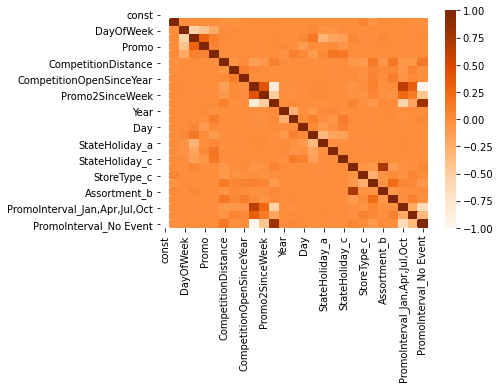

In [36]:
# Check correlation between the independent variables using heatmap

import seaborn as sns
sns.heatmap(X_train_scaled_constant.corr(),cmap='Oranges')

In [37]:
# Since p value is 0.657, so column CompetitionOpenSinceYear is insignificant and we need to remove from model

insignificant_cols=['CompetitionOpenSinceYear' ]

In [38]:
# Remove the insignificant columns identified above from p value
X_train_scaled_constant.drop(insignificant_cols, axis=1, inplace=True)

In [39]:
lin_model=sm.OLS(Y_train, X_train_scaled_constant).fit()
print(lin_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                 4.522e+04
Date:                Sat, 28 Nov 2020   Prob (F-statistic):               0.00
Time:                        17:27:48   Log-Likelihood:            -7.5281e+06
No. Observations:              813767   AIC:                         1.506e+07
Df Residuals:                  813742   BIC:                         1.506e+07
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [40]:
# 9. Using relevant influencing columns, build a linear regression model 
# Fit a model using sklearn

lr= LinearRegression()
lr.fit(X_train_scaled_constant, Y_train)

LinearRegression()

In [41]:
# Print coefficient and intercept
lr.coef_
lr.intercept_
insignificant_cols=['CompetitionOpenSinceYear' ]

In [42]:
y_pred= lr.predict(X_test_scaled_constant.drop(columns=insignificant_cols))

In [43]:
from sklearn.metrics import r2_score
r2_score(Y_test, y_pred)

0.57264675645501

In [44]:
# Get the mean of residuals
y_train_pred= lr.predict(X_train_scaled_constant)


In [45]:
residuals= y_pred-Y_test
print(np.mean(residuals))

-2.5882340125378693


In [46]:
# Mean of residuals should be zero (train set)

y_train_pred = lr.predict(X_train_scaled)

residuals1 = y_train_pred - Y_train

print(np.mean(residuals1))

-1237239253.5064235


In [47]:
# 10. Report RMSE, R square value

print('R square value:', r2_score(Y_test, y_pred))
rmse = np.sqrt(mean_squared_error( Y_test, y_pred))
print("Root Mean Squared Error:", rmse)

R square value: 0.57264675645501
Root Mean Squared Error: 2517.271260082238


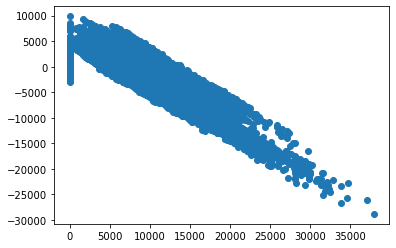

In [48]:
# 11. Plot the coefficients of the input variables using the bar chart
plt.scatter(Y_test, residuals)